In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

df_city=pd.read_csv(city_data_to_load)
df_ride=pd.read_csv(ride_data_to_load)

In [3]:
df_city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
df_ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset

df_all=df_ride.merge(df_city,how='outer',on='city')

In [55]:

# Display the data table for preview

df_all.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [7]:
df_all.shape

(2375, 6)

## Bubble Plot of Ride Sharing Data

In [8]:
# Preview all the city types
df_all.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [29]:
df_all.shape

(2375, 6)

In [9]:
# Obtain the x and y coordinates for each of the three city types

urban=df_all.loc[df_all['type']=='Urban']
suburban=df_all.loc[df_all['type']=='Suburban']
rural=df_all.loc[df_all['type']=='Rural']

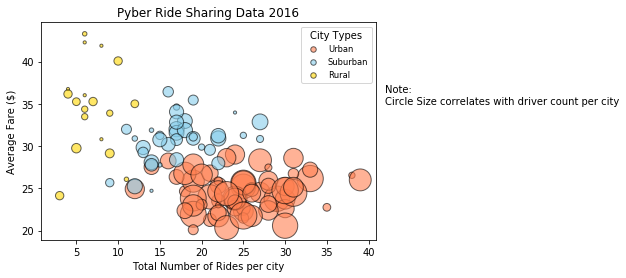

<Figure size 432x288 with 0 Axes>

In [34]:
# Build the scatter plots for each city types

urbanplot=plt.scatter(urban.groupby(['city']).ride_id.count(),urban.groupby(['city']).fare.mean(),
           marker='o',color='coral',s=urban.groupby(['city']).driver_count.first()*10,label='Urban',
           alpha=.6,linewidth=1,edgecolor='black')

suburbanplot=plt.scatter(suburban.groupby(['city']).ride_id.count(),suburban.groupby(['city']).fare.mean(),
           marker='o',color='skyblue',s=suburban.groupby(['city']).driver_count.first()*10,label='Suburban',
           alpha=.6,linewidth=1,edgecolor='black')

ruralplot=plt.scatter(rural.groupby(['city']).ride_id.count(),rural.groupby(['city']).fare.mean(),
           marker='o',color='gold',s=rural.groupby(['city']).driver_count.first()*10,label='Rural',
           alpha=.6,linewidth=1,edgecolor='black')


# Incorporate the other graph properties

plt.title('Pyber Ride Sharing Data 2016')

plt.xlabel('Total Number of Rides per city')

plt.ylabel('Average Fare ($)')

# Create a legend

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size

plt.annotate('Note: \nCircle Size correlates with driver count per city',xy=(50,30),xytext=(42,35),annotation_clip=False)
plt.show()
# Save Figure
plt.savefig('Pyber_RideSharing2016.png')


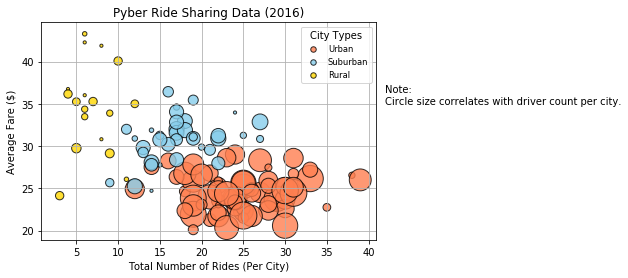

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [35]:
#preview the original data frame
df_all.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [36]:
#visualize all the city types

df_all.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [37]:
#assign the city types as labels

labels=df_all.type.unique()

In [38]:
#calculate the % of fares for each city type

sizes_fares=[df_all.fare[df_all['type']==x].sum()/df_all.fare.sum()for x in labels]

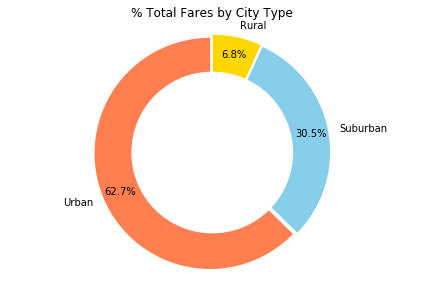

<Figure size 432x288 with 0 Axes>

In [57]:
# Build Pie Chart

explode = (0.02,0.02,0.02)

fares_pie=plt.pie(x= sizes_fares,labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85,explode = explode,colors=('coral','skyblue','gold'))


#draw center circle to create donut chart (this is not necesary but I think it looks cleaner)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equals the axis to ensure a circular figure

plt.tight_layout()
plt.axis('equal')
plt.title('% Total Fares by City Type')

plt.show()
# Save Figure
plt.savefig('Pyber_TotalFaresbyCityType.png')

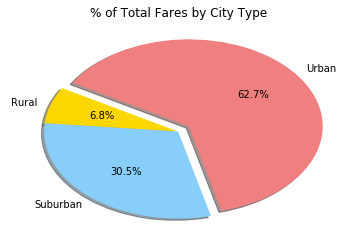

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [40]:
#preview the original data frame
df_all.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [41]:
#visualize all the city types

df_all.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [42]:
#assign the city types as labels

labels=df_all.type.unique()

In [43]:
#calculate the % of rides for each city type

sizes_rides=[df_all.ride_id[df_all['type']==x].nunique()/df_all.ride_id.count()for x in labels]

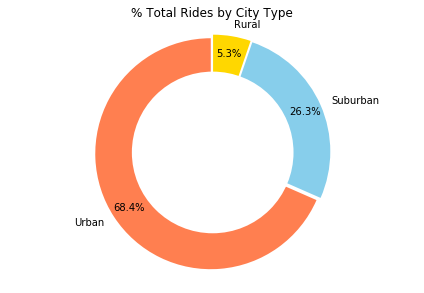

<Figure size 432x288 with 0 Axes>

In [58]:
# Build Pie Chart

explode = (0.02,0.02,0.02)

rides_pie=plt.pie(x= sizes_rides,labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85,explode = explode,colors=('coral','skyblue','gold'))


#draw center circle to create donut chart (this is not necesary but I think it looks cleaner)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equals the axis to ensure a circular figure

plt.tight_layout()
plt.axis('equal')
plt.title('% Total Rides by City Type')

plt.show()
# Save Figure
plt.savefig('Pyber_TotalRidesbyCityType.png')



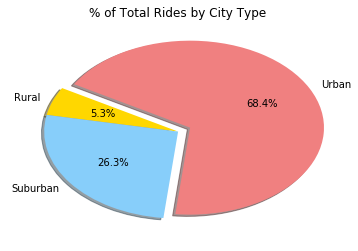

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [45]:
#preview the original data frame
df_all.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [46]:
#visualize all the city types

df_all.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [47]:
#assign the city types as labels

labels=df_all.type.unique()

In [48]:
#group the data by type and city to get the drivers count by city
driver_count_df=pd.DataFrame(df_all[['city','driver_count','type']].groupby(['type','city']).first())

#reset index to access the columns with comprenhension list
dc_df=driver_count_df.reset_index()

dc_df.head()

,type,city,driver_count
0,Rural,Bradshawfurt,7
1,Rural,Garzaport,7
2,Rural,Harringtonfort,4
3,Rural,Jessicaport,1
4,Rural,Lake Jamie,4


In [49]:
#calculate the % of drivers for each city type
sizes_drivers=[dc_df[dc_df['type']==x].driver_count.sum()/dc_df.driver_count.sum() for x in labels]

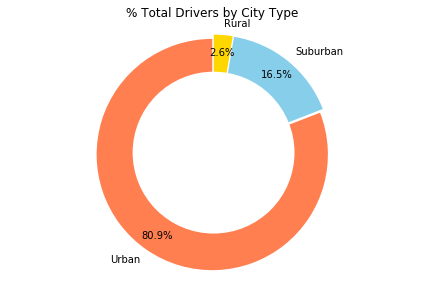

<Figure size 432x288 with 0 Axes>

In [59]:
# Build Pie Chart

explode = (0.02,0.02,0.02)

drivers_pie=plt.pie(x= sizes_drivers,labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85,explode = explode,colors=('coral','skyblue','gold'))


#draw center circle to create donut chart (this is not necesary but I think it looks cleaner)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equals the axis to ensure a circular figure

plt.tight_layout()
plt.axis('equal')
plt.title('% Total Drivers by City Type')

plt.show()
# Save Figure
plt.savefig('Pyber_TotalDriversbyCityType.png')


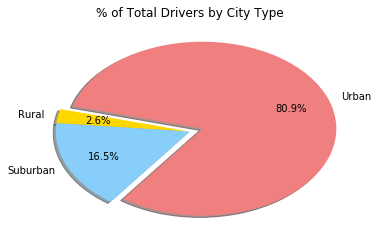

In [6]:
# Show Figure
plt.show()

Conclusions:

The most urbanized is the city the lower the average fare is.
This could be due to the number of drivers that are in the urban cities.
Around 80% of the drivers are in urban cities but only 68% of the rides are from urban cities.
This means that there is a supply excess in the urban cities. Depending on the company strategy, they could decrease the number of drivers in urban cities and increse the number of drivers of the sub urban and rural cities to equilibrate the fares. However further analysis is required to validate statisticaly this diferences and to analyze why is such a supply excess in the urban cities.

    
    